# Generating MNIST Digits On Demand with a Conditional GAN

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<a href="https://colab.research.google.com/github/DeepTrackAI/DeepLearningCrashCourse/blob/main/Ch09_GAN/ec09_A_cgan_mnist/cgan_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<strong>If using Colab/Kaggle:</strong> You need to uncomment the code in the cell below this one.
</div>

In [1]:
!pip install deeplay  # Uncomment if using Colab/Kaggle.

This notebook provides you with a complete code example to generate specific MNIST digits on demand with a conditional GAN.

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<strong>Note:</strong> This notebook contains the Code Example 9-A from the book  

**Deep Learning Crash Course**  
Giovanni Volpe, Benjamin Midtvedt, Jesús Pineda, Henrik Klein Moberg, Harshith Bachimanchi, Joana B. Pereira, Carlo Manzo  
No Starch Press, San Francisco (CA), 2026  
ISBN-13: 9781718503922  

[https://nostarch.com/deep-learning-crash-course](https://nostarch.com/deep-learning-crash-course)

You can find the other notebooks on the [Deep Learning Crash Course GitHub page](https://github.com/DeepTrackAI/DeepLearningCrashCourse).
</div>

## Loading the MNIST Dataset with PyTorch

Implement the digit transformations ...

In [2]:
from torchvision.transforms import Compose, Normalize, Resize, ToTensor

transform = Compose([Resize((64, 64)), ToTensor(),
                     Normalize(mean=[0.5], std=[0.5], inplace=True)])

... import the MNIST digits ...

In [3]:
from torchvision.datasets import MNIST

trainset = MNIST(root="data", train=True, transform=transform, download=True)

... and plot some of the transformed MNIST digits.

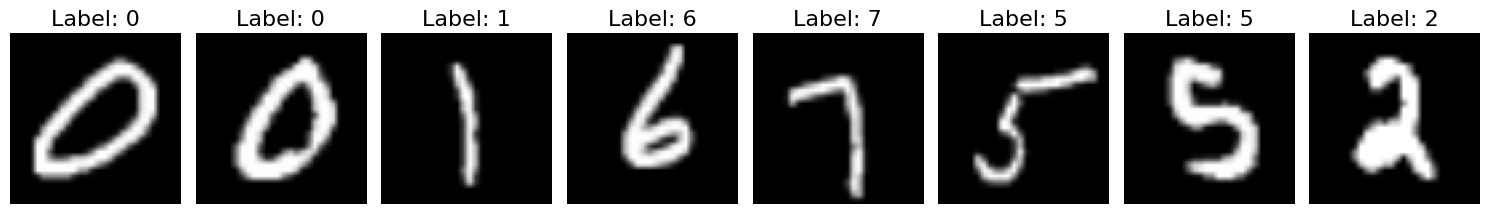

In [4]:
import torch
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 8, figsize=(15, 3))
for ax in axs.ravel():
    img, label = trainset[torch.randint(0, len(trainset), (1,)).squeeze()]
    ax.imshow(img.squeeze(), cmap="gray")
    ax.set_title(f"Label: {label}", fontsize=16)
    ax.axis("off")
plt.tight_layout()
plt.show()    

## Defining the Generator and Discriminator

Determine the device to be used in the computations ...

In [5]:
def get_device():
    """Select device where to perform the computations."""
    if torch.cuda.is_available():
        return torch.device("cuda:0")
    elif torch.backends.mps.is_available():
        return torch.device("mps")
    else:
        return torch.device("cpu")

device = get_device()

print(f"Selected device: {device}")

Selected device: mps


... instantiate the generator ...

In [ ]:
import deeplay as dl

latent_dim = 100

gen = dl.DCGANGenerator(
    latent_dim=latent_dim, features_dim=64, output_channels=1,
    class_conditioned_model=True, embedding_dim=100, num_classes=10,
).build().to(device)

... and instantiate the discriminator.

In [7]:
disc = dl.DCGANDiscriminator(
    input_channels=1, features_dim=64, class_conditioned_model=True,
    embedding_dim=100, num_classes=10,
).build().to(device)

## Training the GAN

Define the data loader ...

In [8]:
loader = dl.DataLoader(trainset, batch_size=128, shuffle=True)

... define the loss function ...

In [9]:
loss = torch.nn.BCELoss()

... define the optimizers ...

In [10]:
optim_gen = torch.optim.Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999))
optim_disc = torch.optim.Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999))

... implement the adversarial training ...


Epoch 1/10
----------
Batch 1/469: Generator Loss: 0.8304, Discriminator Loss: 0.7009
Batch 101/469: Generator Loss: 2.1328, Discriminator Loss: 0.2298
Batch 201/469: Generator Loss: 0.9834, Discriminator Loss: 0.5298
Batch 301/469: Generator Loss: 0.3534, Discriminator Loss: 0.6614
Batch 401/469: Generator Loss: 0.8558, Discriminator Loss: 0.5607
----------
Epoch 1/10: Generator Loss: 1.9341, Discriminator Loss: 0.4404, Time taken: 0:04:07.874630


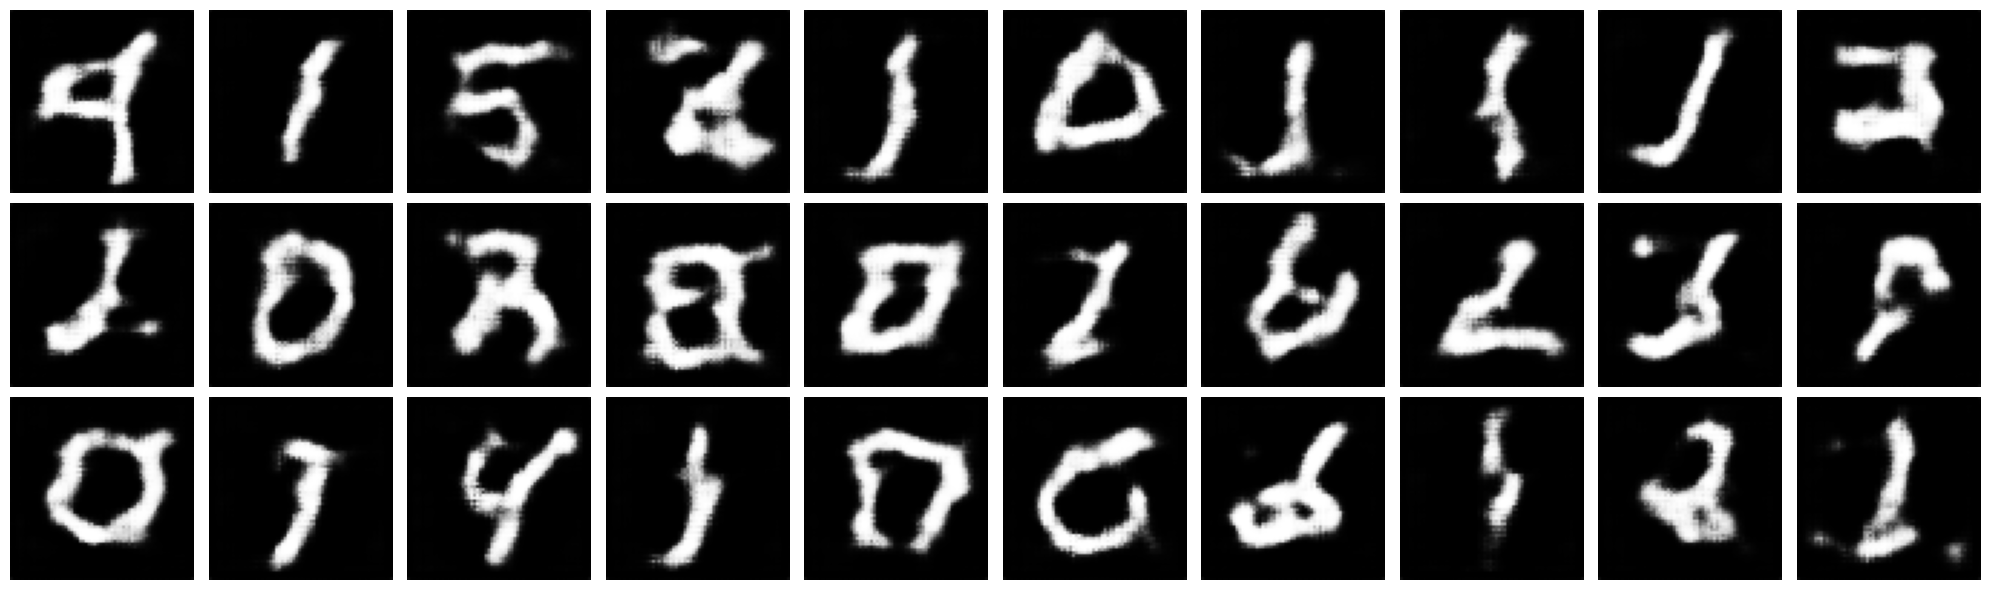


Epoch 2/10
----------
Batch 1/469: Generator Loss: 1.7987, Discriminator Loss: 0.3581
Batch 101/469: Generator Loss: 0.9021, Discriminator Loss: 0.4436
Batch 201/469: Generator Loss: 1.3559, Discriminator Loss: 0.4519
Batch 301/469: Generator Loss: 0.7702, Discriminator Loss: 0.4102
Batch 401/469: Generator Loss: 1.4092, Discriminator Loss: 0.5080
----------
Epoch 2/10: Generator Loss: 1.4159, Discriminator Loss: 0.4558, Time taken: 0:04:07.711505


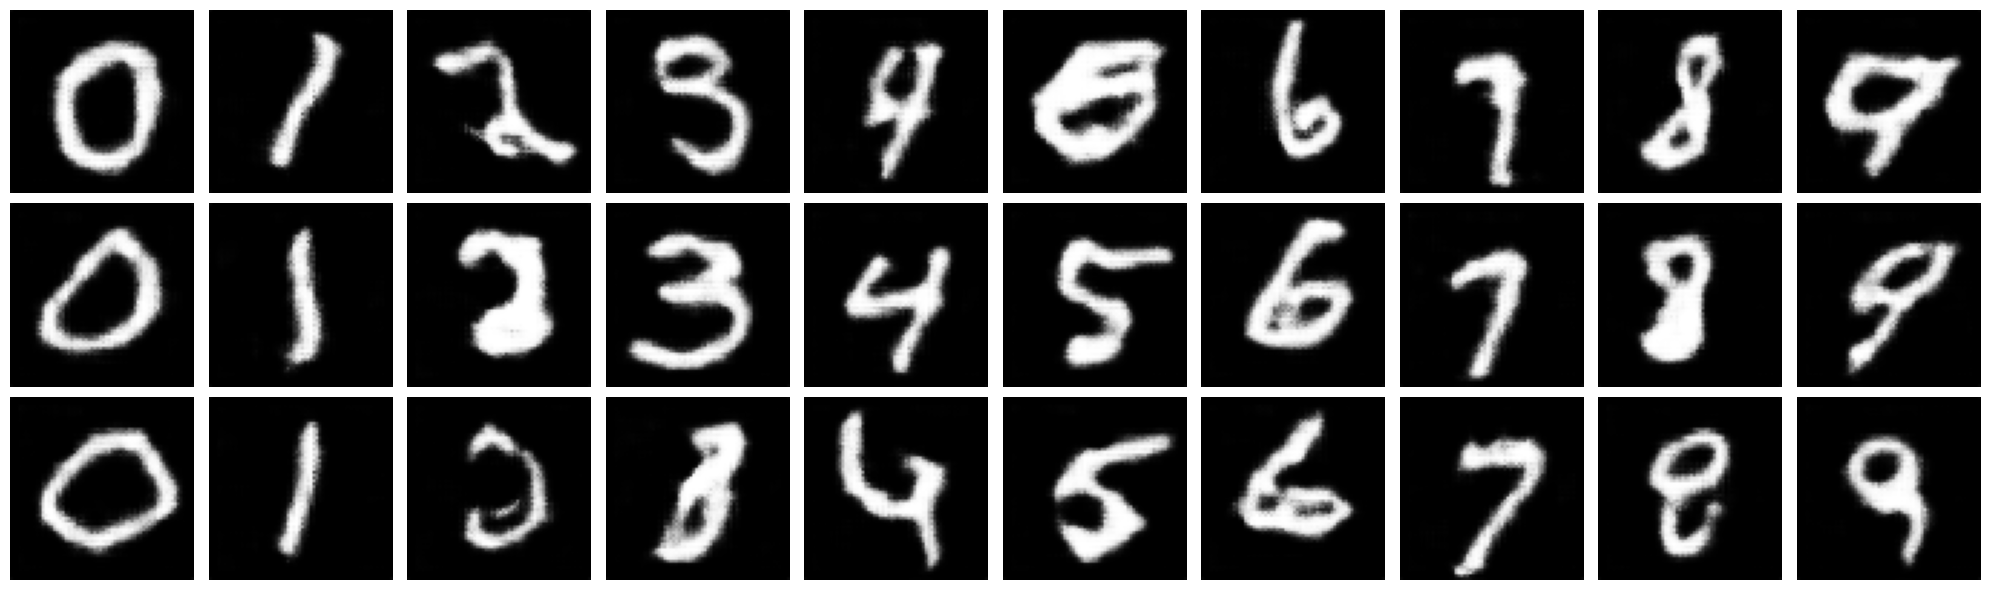


Epoch 3/10
----------
Batch 1/469: Generator Loss: 0.9533, Discriminator Loss: 0.3801
Batch 101/469: Generator Loss: 1.8644, Discriminator Loss: 0.3969
Batch 201/469: Generator Loss: 1.5348, Discriminator Loss: 0.3595
Batch 301/469: Generator Loss: 1.6912, Discriminator Loss: 0.3472
Batch 401/469: Generator Loss: 2.6911, Discriminator Loss: 0.3266
----------
Epoch 3/10: Generator Loss: 1.6440, Discriminator Loss: 0.4373, Time taken: 0:04:05.422575


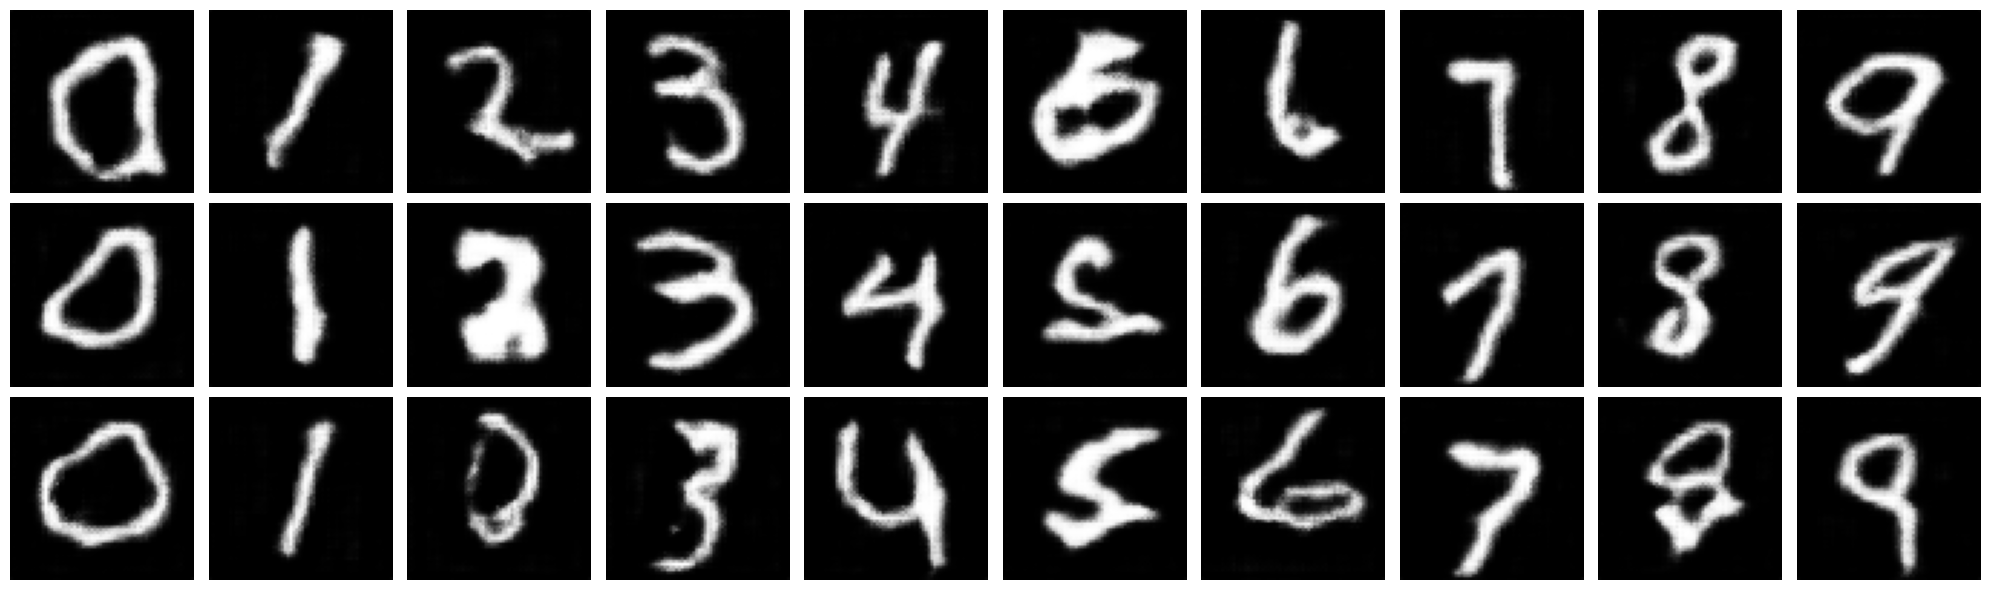


Epoch 4/10
----------
Batch 1/469: Generator Loss: 1.9760, Discriminator Loss: 0.3046
Batch 101/469: Generator Loss: 2.0462, Discriminator Loss: 0.1726
Batch 201/469: Generator Loss: 3.8530, Discriminator Loss: 0.1762
Batch 301/469: Generator Loss: 3.2257, Discriminator Loss: 0.3867
Batch 401/469: Generator Loss: 2.7438, Discriminator Loss: 0.0810
----------
Epoch 4/10: Generator Loss: 2.3000, Discriminator Loss: 0.3150, Time taken: 0:04:05.857086


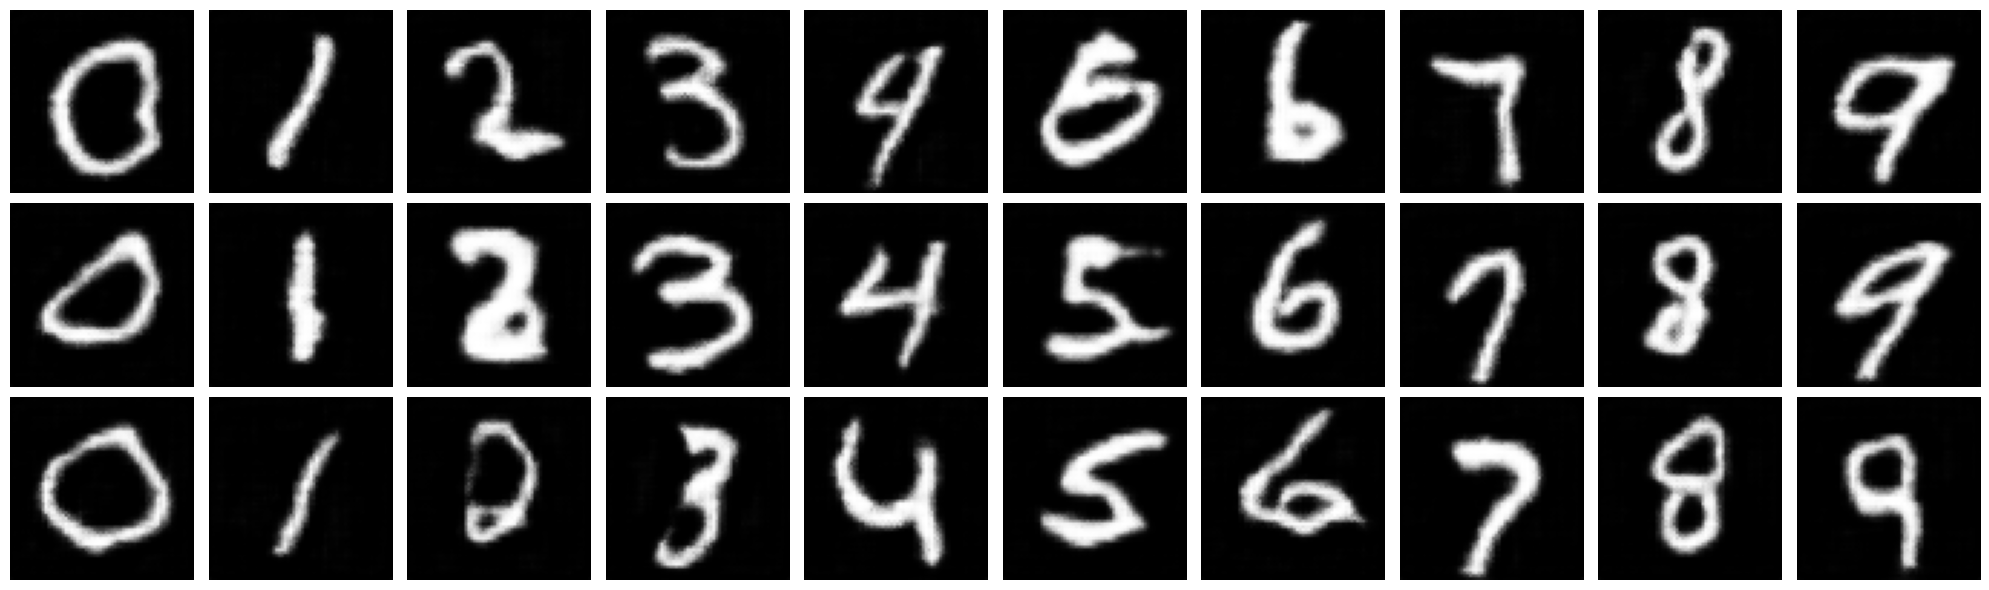


Epoch 5/10
----------
Batch 1/469: Generator Loss: 0.9907, Discriminator Loss: 2.0852
Batch 101/469: Generator Loss: 1.2498, Discriminator Loss: 0.1236
Batch 201/469: Generator Loss: 2.9956, Discriminator Loss: 0.0870
Batch 301/469: Generator Loss: 1.7096, Discriminator Loss: 0.3708
Batch 401/469: Generator Loss: 2.3248, Discriminator Loss: 0.0574
----------
Epoch 5/10: Generator Loss: 2.8273, Discriminator Loss: 0.2274, Time taken: 0:04:04.866253


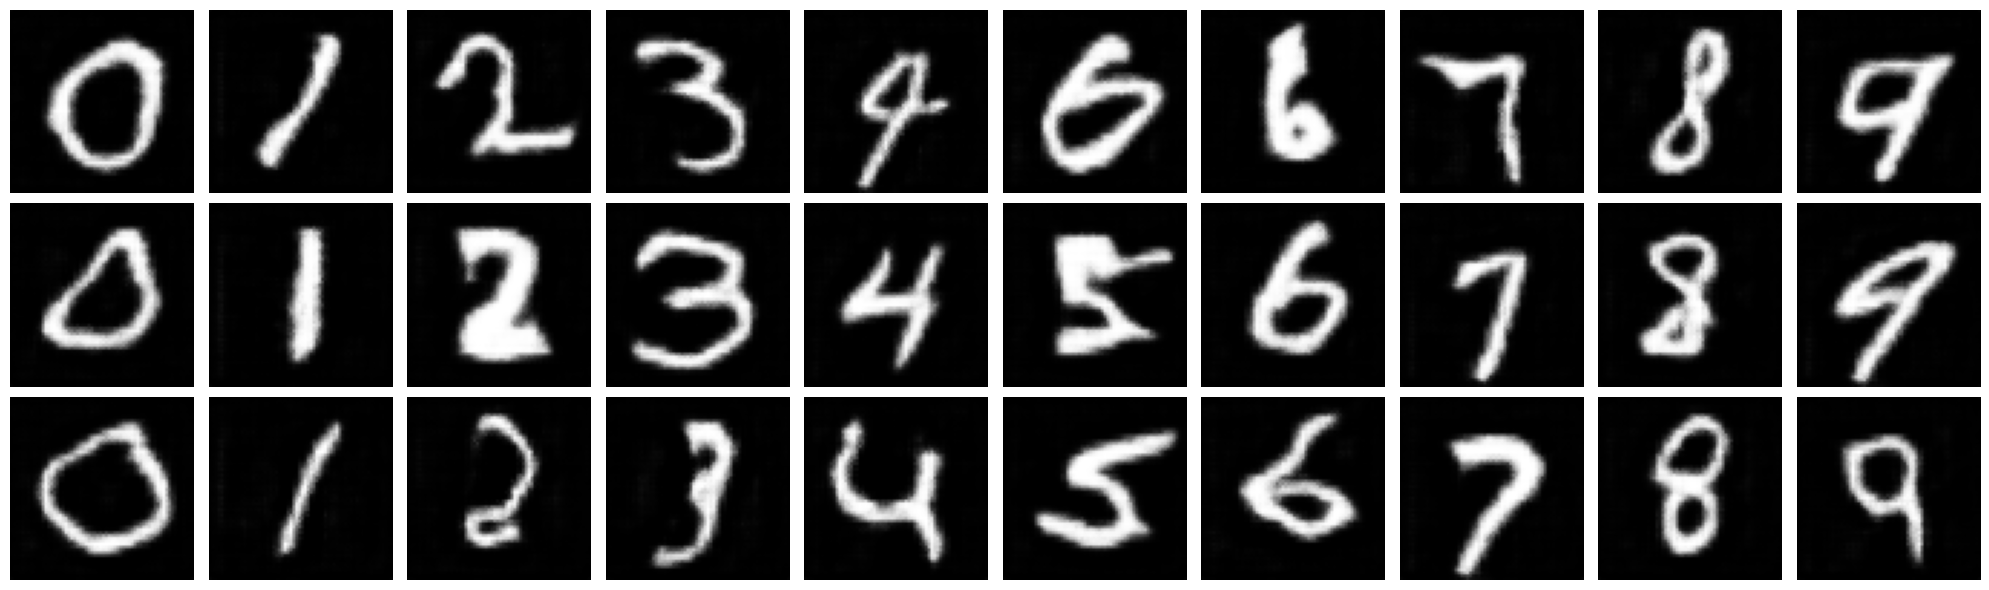


Epoch 6/10
----------
Batch 1/469: Generator Loss: 3.7879, Discriminator Loss: 0.0491
Batch 101/469: Generator Loss: 0.9451, Discriminator Loss: 0.5138
Batch 201/469: Generator Loss: 1.7572, Discriminator Loss: 0.2928
Batch 301/469: Generator Loss: 3.4716, Discriminator Loss: 0.0557
Batch 401/469: Generator Loss: 2.2284, Discriminator Loss: 0.3659
----------
Epoch 6/10: Generator Loss: 2.9196, Discriminator Loss: 0.2155, Time taken: 0:04:05.282779


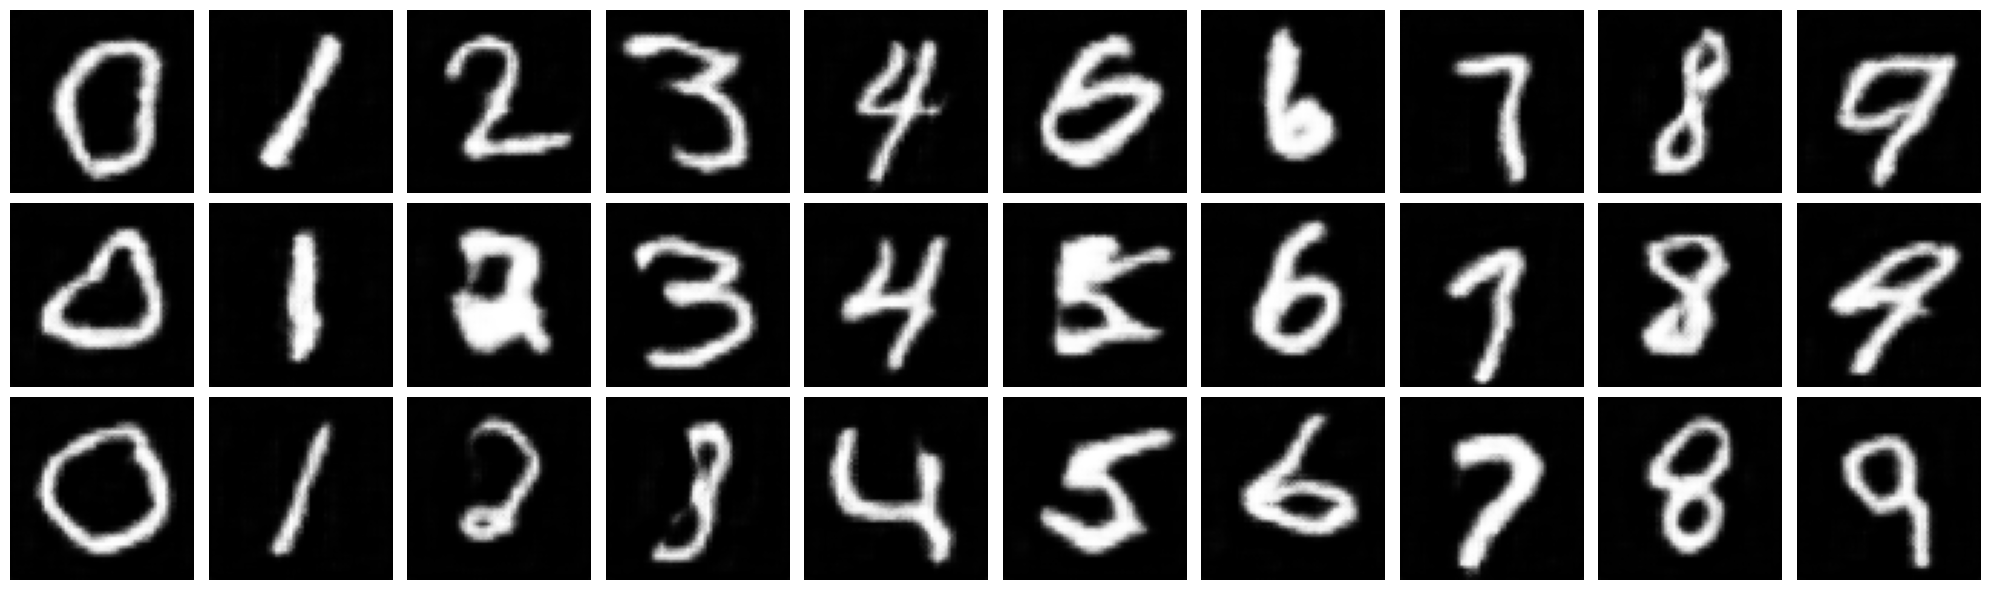


Epoch 7/10
----------
Batch 1/469: Generator Loss: 3.9330, Discriminator Loss: 0.0359
Batch 101/469: Generator Loss: 3.6709, Discriminator Loss: 0.1614
Batch 201/469: Generator Loss: 3.8422, Discriminator Loss: 0.0337
Batch 301/469: Generator Loss: 3.7113, Discriminator Loss: 0.0228
Batch 401/469: Generator Loss: 4.2357, Discriminator Loss: 0.0254
----------
Epoch 7/10: Generator Loss: 3.5685, Discriminator Loss: 0.1371, Time taken: 0:04:05.529214


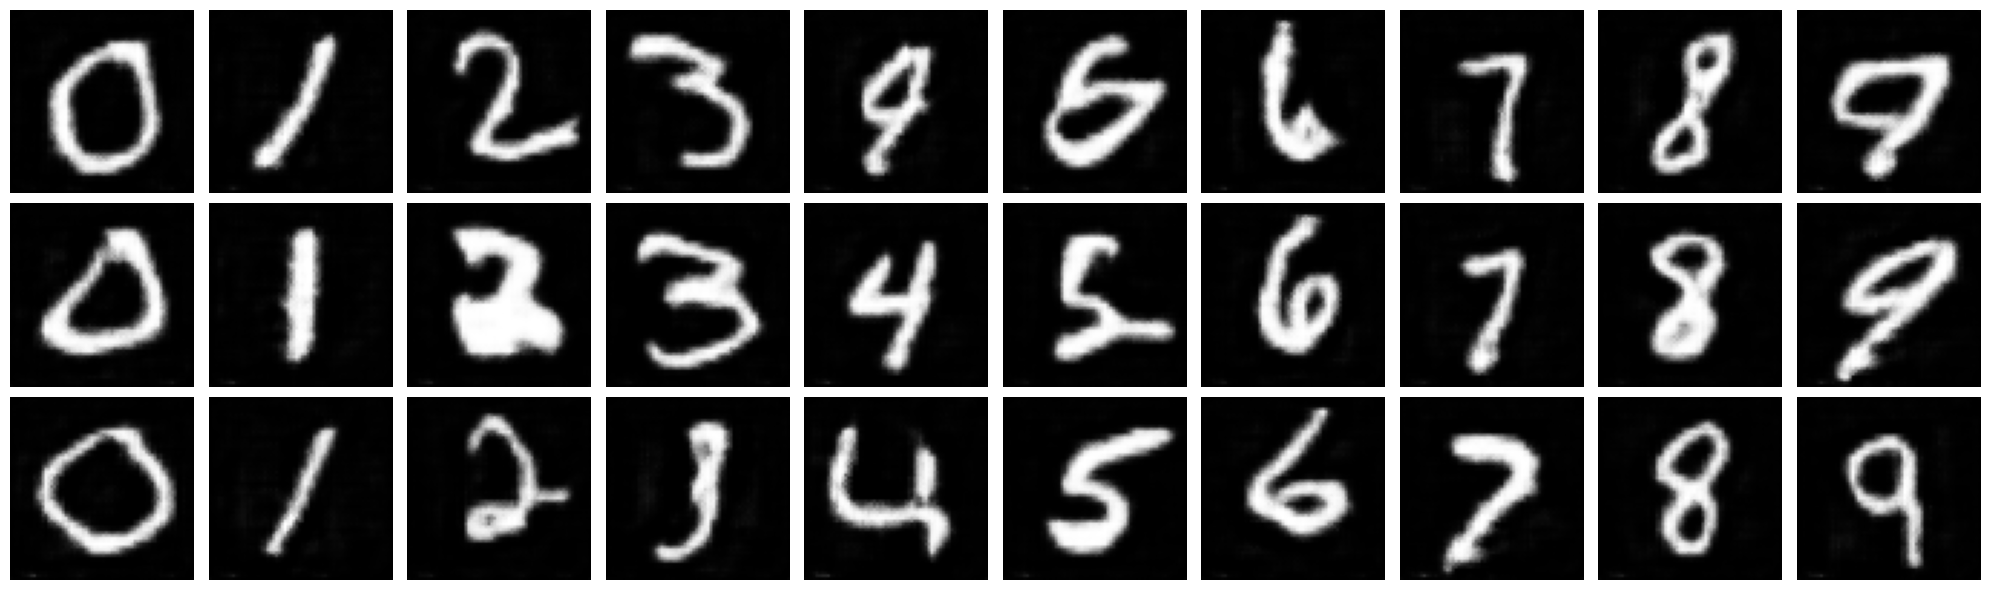


Epoch 8/10
----------
Batch 1/469: Generator Loss: 4.1800, Discriminator Loss: 0.0364
Batch 101/469: Generator Loss: 4.5779, Discriminator Loss: 0.0209
Batch 201/469: Generator Loss: 4.4186, Discriminator Loss: 0.0112
Batch 301/469: Generator Loss: 2.5813, Discriminator Loss: 0.3002
Batch 401/469: Generator Loss: 1.1505, Discriminator Loss: 0.3608
----------
Epoch 8/10: Generator Loss: 3.5806, Discriminator Loss: 0.1815, Time taken: 0:04:06.190070


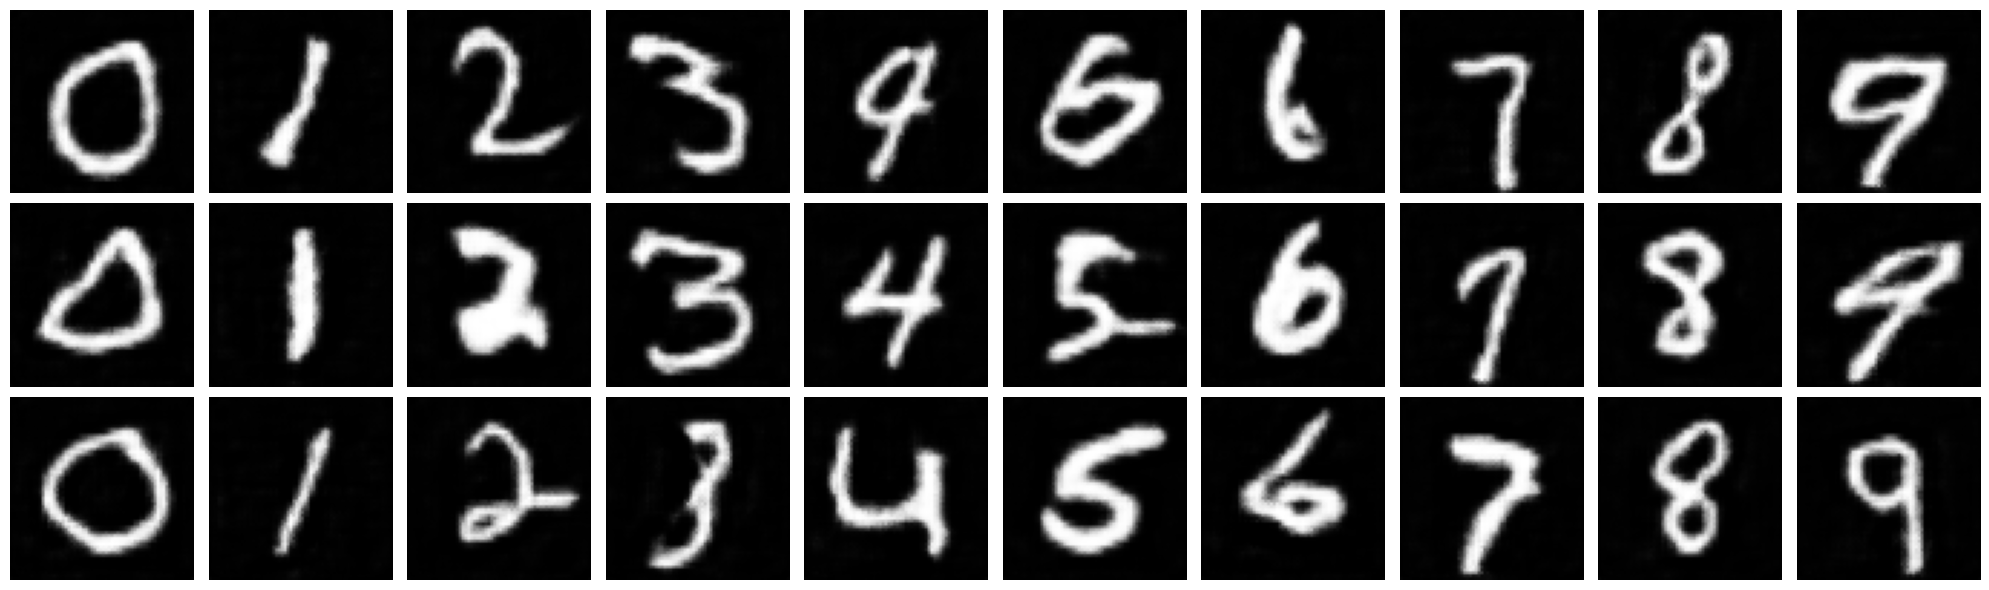


Epoch 9/10
----------
Batch 1/469: Generator Loss: 1.8083, Discriminator Loss: 0.2361
Batch 101/469: Generator Loss: 3.8159, Discriminator Loss: 0.0279
Batch 201/469: Generator Loss: 2.8423, Discriminator Loss: 0.1296
Batch 301/469: Generator Loss: 4.2432, Discriminator Loss: 0.0175
Batch 401/469: Generator Loss: 4.3460, Discriminator Loss: 0.0177
----------
Epoch 9/10: Generator Loss: 3.6317, Discriminator Loss: 0.1347, Time taken: 0:04:06.706863


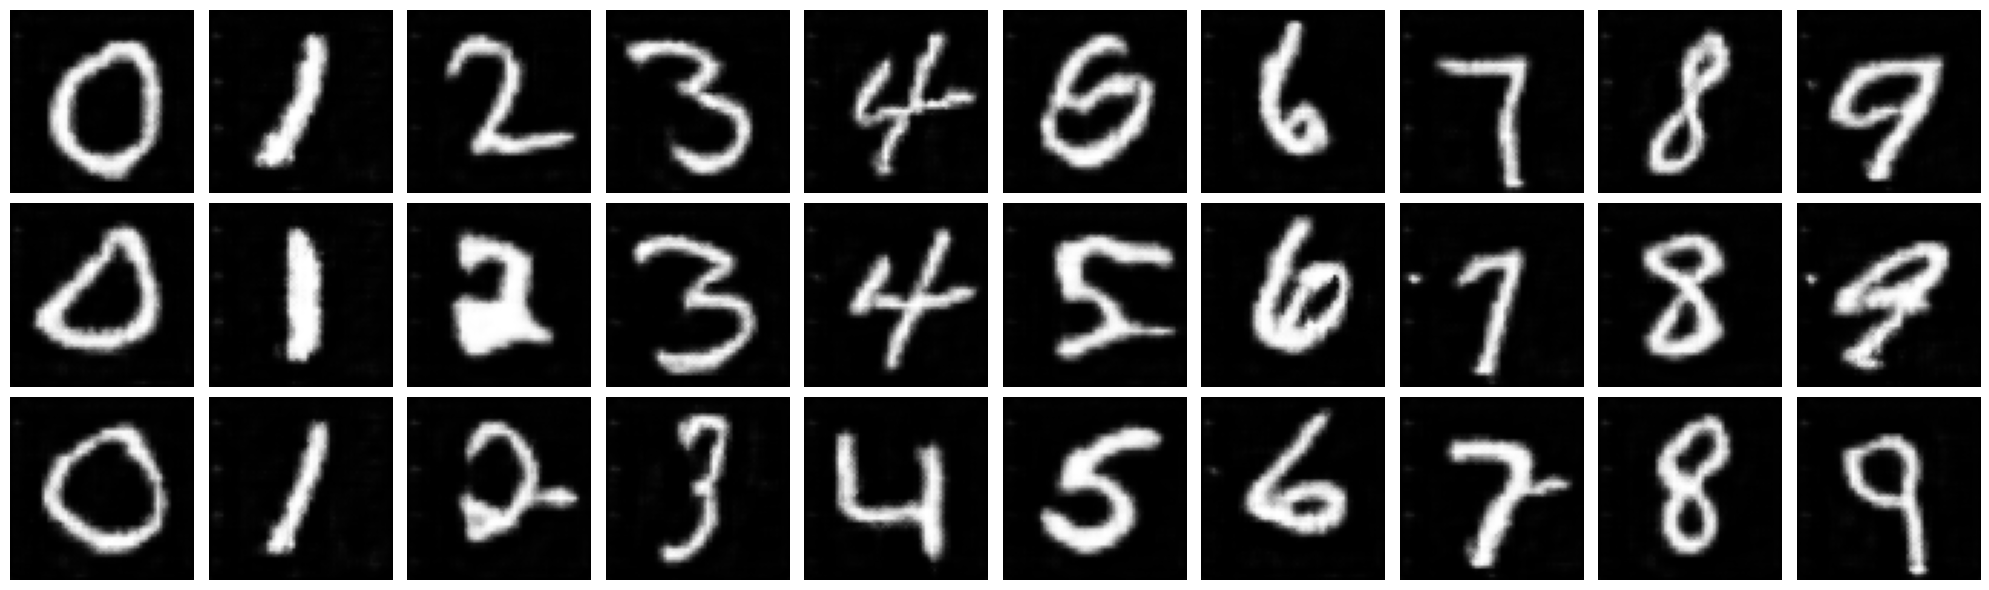


Epoch 10/10
----------
Batch 1/469: Generator Loss: 4.6670, Discriminator Loss: 0.0095
Batch 101/469: Generator Loss: 1.4777, Discriminator Loss: 0.3746
Batch 201/469: Generator Loss: 3.4958, Discriminator Loss: 0.0446
Batch 301/469: Generator Loss: 4.0985, Discriminator Loss: 0.0320
Batch 401/469: Generator Loss: 1.5850, Discriminator Loss: 0.2448
----------
Epoch 10/10: Generator Loss: 3.4143, Discriminator Loss: 0.2081, Time taken: 0:04:05.855402


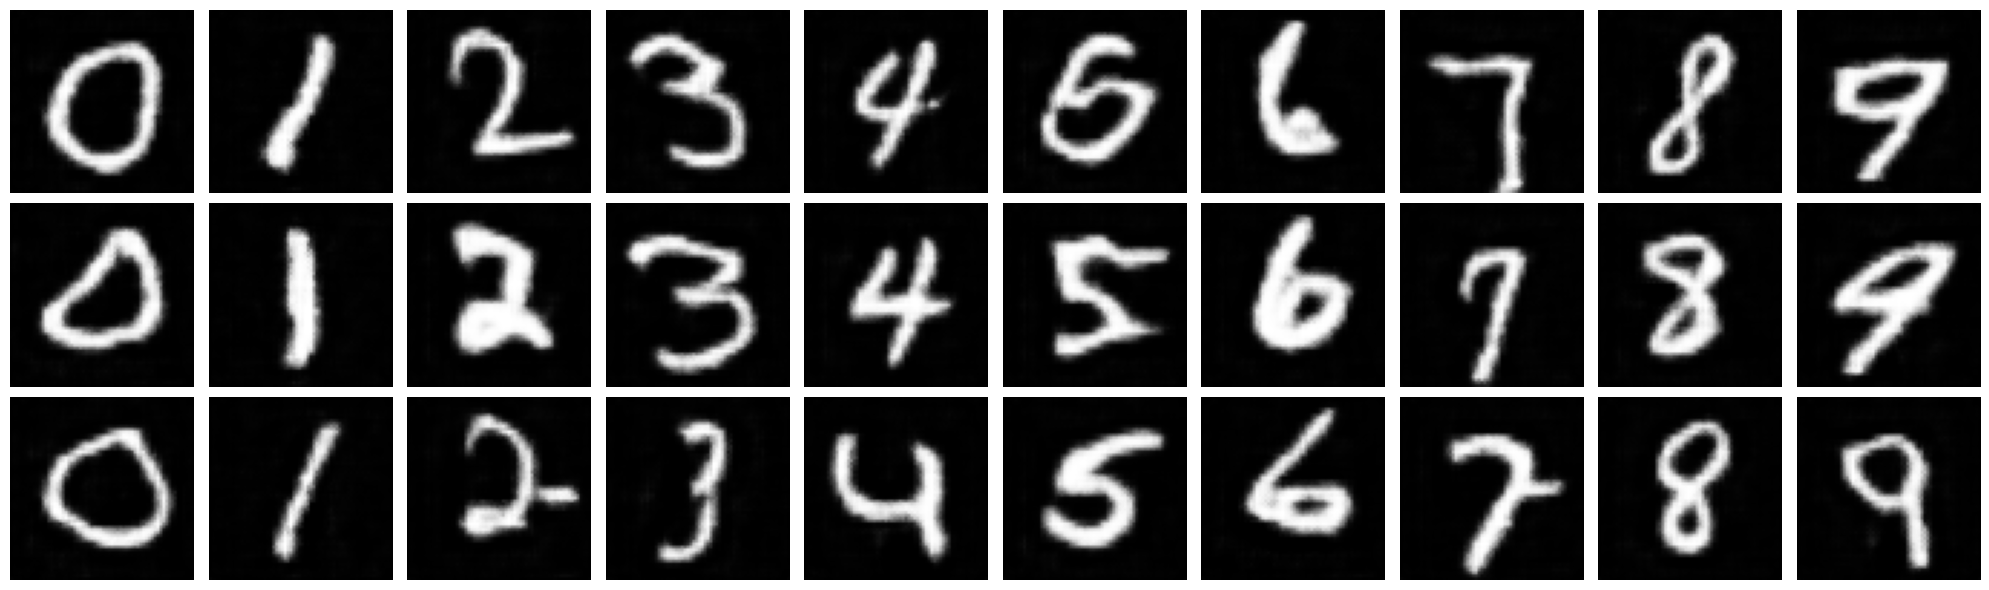

In [11]:
import time
from datetime import timedelta

epochs = 10

num_batches = len(loader)
gen_losses_avg, disc_losses_avg = [], []
fix_latent_vector = torch.randn(30, latent_dim, 1, 1).to(device)
fix_class_labels = torch.arange(0, 10).repeat(3).to(device)
for epoch in range(epochs):
    gen.train(), disc.train()

    print("\n" + f"Epoch {epoch + 1 }/{epochs}" + "\n" + "-" * 10)
    start_time = time.time()

    running_gen_loss, running_disc_loss = 0.0, 0.0
    for batch_idx, (real_images, class_labels) in enumerate(loader, start=0):
        real_images = real_images.to(device)
        class_labels = class_labels.to(device)

        noise = torch.randn(real_images.shape[0],
                            latent_dim, 1, 1).to(device)
        fake_images = gen(noise, class_labels)

        # 1. Discriminator training: minimize - log(D(x)) - log(1 - D(G(z))).
        real_output = disc(real_images, class_labels).reshape(-1)
        fake_output = disc(fake_images, class_labels).reshape(-1)

        real_loss = loss(real_output, torch.ones_like(real_output))
        fake_loss = loss(fake_output, torch.zeros_like(fake_output))

        disc_loss = (real_loss + fake_loss) / 2

        optim_disc.zero_grad()
        disc_loss.backward(retain_graph=True)
        optim_disc.step()

        # 2. Generator training: minimize - log(D(G(z))).
        fake_output = disc(fake_images, class_labels).reshape(-1)
        gen_loss = loss(fake_output, torch.ones_like(fake_output))

        optim_gen.zero_grad()
        gen_loss.backward()
        optim_gen.step()

        if batch_idx % 100 == 0:
            print(f"Batch {batch_idx + 1}/{num_batches}: "
                  f"Generator Loss: {gen_loss.item():.4f}, "
                  f"Discriminator Loss: {disc_loss.item():.4f}")

        running_gen_loss += gen_loss.item()
        running_disc_loss += disc_loss.item()

    gen_losses_avg.append(running_gen_loss / num_batches)
    disc_losses_avg.append(running_disc_loss / num_batches)
    end_time = time.time()

    print("-" * 10 + "\n" + f"Epoch {epoch + 1}/{epochs}: "
          f"Generator Loss: {gen_losses_avg[-1]:.4f}, "
          f"Discriminator Loss: {disc_losses_avg[-1]:.4f}, "
          f"Time taken: {timedelta(seconds=end_time - start_time)}")

    gen.eval(), disc.eval()
    fake_images = gen(fix_latent_vector,
                      fix_class_labels).detach().cpu().numpy()

    fig, axs = plt.subplots(3, 10, figsize=(20, 6))
    for i, ax in enumerate(axs.ravel()):
        ax.imshow(fake_images[i][0], cmap="gray")
        ax.axis("off")
    plt.tight_layout()
    plt.show()
    plt.close(fig)

## Plotting the Training Losses

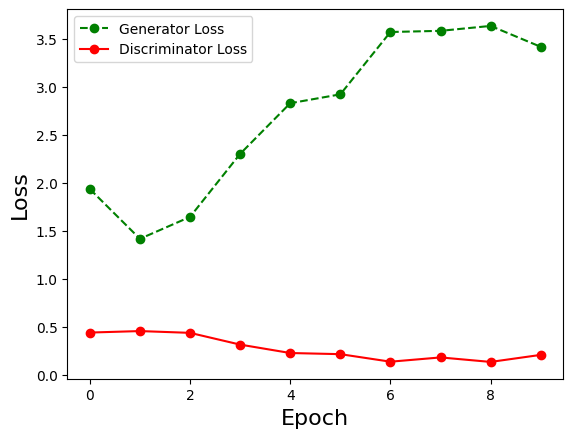

In [12]:
import numpy as np

plt.plot(np.arange(len(gen_losses_avg)), gen_losses_avg, "g--o",
         label="Generator Loss")
plt.plot(np.arange(len(disc_losses_avg)), disc_losses_avg, "r-o",
         label="Discriminator Loss")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend()
plt.show()